
######*Syed Zain Raza*
----
##Goal

Your goal in this assigment is to implement aLogistic Regression Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.

## For Graphical Debugging:
You can use the [pycharm](https://www.jetbrains.com/pycharm/download/#section=linux) excellent graphical debugging based IDE.



###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack+\frac{\lambda}{2}\sum_{i=1}^k \theta_k^2$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}+\lambda*\theta_k$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




###Tasks
1. Please read the file "classifier.py", this is the main class from which all other classes are inherited. Also read the following files, optimizer.py and preprocessing.py.
2. Complete the missing functions definitions in file "logisticregression.py". You will need to override the following functions: hypothesis, cost_function and derivative_cost_function. **Please read the function definition before proceeding with code writing**.
3. Complete the missing function definition gradient_descent  in file "optimizer.py"
4. Run the complete notebook & check that you are getting the right results from your classifiers.

**Remember In Logistic Regression true labels will be 1 and 0, while in SVM and Perceptron they will +1 and -1**

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

### Create some dummy data for testing

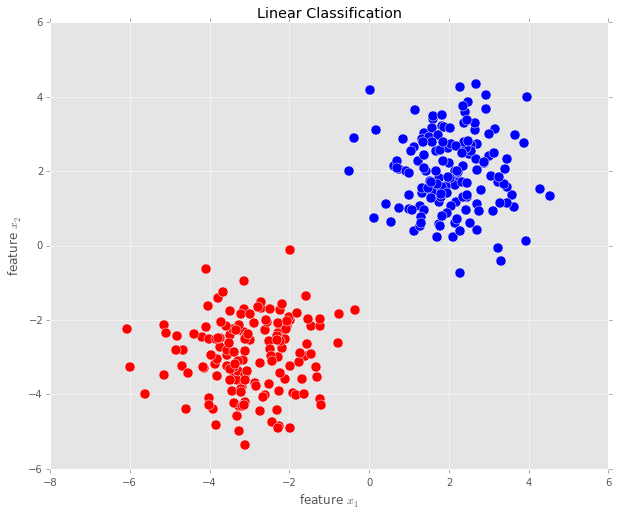

In [4]:
#Please carefully read the code to understand it...
np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),np.zeros((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr.svg',format='svg')

In [5]:
from perceptron import * 
from preprocessing import * 

In [6]:
print X.shape,Y.shape

(300L, 2L) (300L, 1L)


In [7]:
#Scale the features....
preprocess=PreProcessing(X)
X=preprocess.process_features(X)

In [8]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [9]:
print X.shape,Y.shape

(300L, 3L) (300L, 1L)


###Create the Classifier Object

In [10]:
from logisiticregression import *
lr=LogisticRegression(0.001)

In [11]:
###Let's Check the Derivatives...

In [13]:
#lets check the derivatives of lr by calling the static function 
from optimizer import *
Optimizer.gradient_check(X,Y,lr.cost_function,lr.derivative_cost_function)

[[ 1.86945282]
 [ 2.92658775]
 [-0.56627374]] [[ 0.91287065]
 [ 0.91119594]
 [-0.01174609]]
[[ 1.86955282]
 [ 2.92658775]
 [-0.56627374]] diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]]
[[ 1.86945282]
 [ 2.92668775]
 [-0.56627374]] diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]]
[[ 1.86945282]
 [ 2.92658775]
 [-0.56617374]] diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]]
Computational derivatvie = [array([ 0.91287065]), array([ 0.91119594]), array([-0.01174609])]
Analytical derivative = [ 0.91287065  0.91119594 -0.01174609]
Relative Error = [[  2.14980215e-11   9.18120425e-04   1.00000000e+00]
 [  9.18120467e-04   2.06274315e-11   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   6.26798568e-10]]


###Training Time

In [18]:
lr.train(X,Y,Optimizer(alpha=0.1)) # 
# Your answer should be identical with these parameters, i.e.
# Value of Cost Function at Minimum Points [[-3.47643987]
# [-3.42427651]
# [ 0.12890574]], is 0.00730339351388


Value of Cost Function at Minimum Points [[-3.47994015]
 [-3.41461817]
 [ 0.14001377]], is 0.00732221346627


###Testing Time.... 
Lets plot the decision boundary to see how good our classifier is performing... 

[ 2.16403103] [-1.84979118]


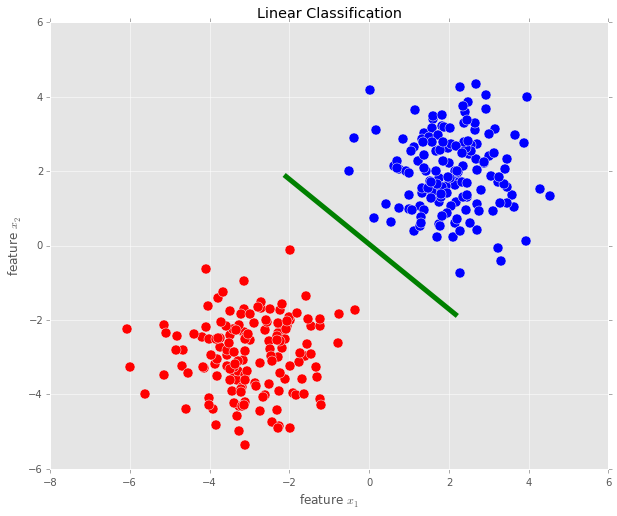

In [19]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])



y1=(-lr.theta[2]-lr.theta[0]*minx)/lr.theta[1]
y2=(-lr.theta[2]-lr.theta[0]*maxx)/lr.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr-class.svg',format='svg')

-2.08310573339 -2.08317545708 1.85526711777 1.85530326593
(1000L, 3L)
[ 1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.
  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.  1.
  1.  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.
  0.  0.  1.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.
  1.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.
  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  0.
  0.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  0.  0.  1.  0.
  0.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  

(-1.8478945853318356, 1.8268710738260068)

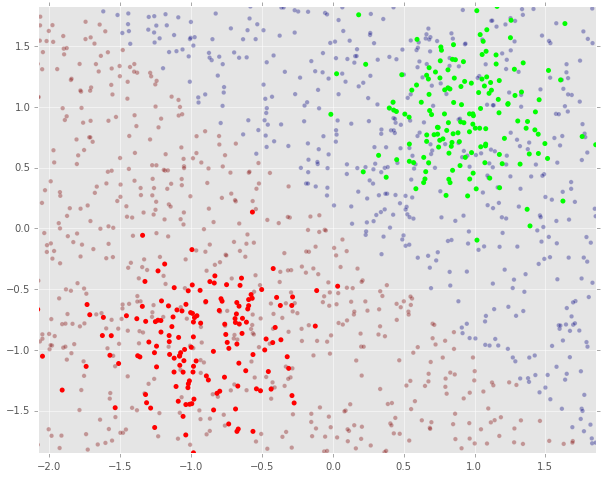

In [20]:
npts=1000
model=lr
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.min(), X.min(), tx.max(), X.max()
tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape
cs= model.predict(tx)
print cs.flatten(), np.unique(cs).flatten()
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y),), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

###Testing on IRIS dataset

In [21]:
#load the data set
data=pd.read_csv('iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [22]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [23]:
preprocess=PreProcessing(X)
X=preprocess.process_features(X)

In [24]:
lrclass=LogisticRegression(lembda=0.001)

In [25]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [26]:
Y[Y=='Iris-versicolor']=0
Y[Y=='Iris-setosa']=+1
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [27]:
print X

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301  1.        ]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301  1.        ]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301  1.        ]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301  1.        ]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657   1.        ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436  1.        ]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301  1.        ]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301  1.        ]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167  1.        ]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301  1.        ]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301  1.        ]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167  1.        ]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167  1.        ]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301  1.        ]
 [-0.17960833  3.122368   -1.29694332 -1.0614657   1.        ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657   1.  

In [28]:
print Y

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [29]:
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytest=Ytest.reshape(len(Ytest),1)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   


 Training Data Set Dimensions= (104L, 5L) Training True Class labels dimensions (104L, 1L)
 Test Data Set Dimensions= (45L, 5L) Test True Class labels dimensions (45L, 1L)


In [30]:
print Ytrain.flatten(),Ytest.flatten()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [31]:
%pdb
lrclass.train(Xtrain,Ytrain,Optimizer(alpha=0.01)) # your cost function at the minimum must be close to zero...

Automatic pdb calling has been turned ON
Value of Cost Function at Minimum Points [[-0.78870346]
 [ 1.69352215]
 [-1.23021839]
 [-1.15638877]
 [-0.84259379]], is 0.0518343696449


In [32]:
#Lets test it on the set of unseen examples...
pclasses=lrclass.predict(Xtest)
print pclasses.flatten(),Ytest.flatten()

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


In [33]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
t.print_confusion_matrix(pclasses.ravel(),Ytest.ravel())

45
Accuracy =  1.0


Predicted,0.0,1.0,All
Actual,,,
0,30,0,30
1,0,15,15
All,30,15,45
